In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = pd.read_csv("device_data.csv")

In [133]:
data

,id,date,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,w_alarm
0,17,2024-04-10 10:50:13.836067+00:00,39.0,22.9,38.3,22.6,2239,19.8,True
1,33,2024-04-10 11:10:14.782679+00:00,39.0,22.8,38.5,22.5,89,20.1,True
2,51,2024-04-03 15:16:30.862480+00:00,39.0,22.8,44.2,22.5,9585,25.2,True
3,67,2024-04-03 15:23:01.147618+00:00,39.0,25.8,35.6,25.0,791,22.1,True
4,83,2024-04-03 15:42:55.101740+00:00,34.0,25.7,33.7,25.0,0,19.2,True
...,...,...,...,...,...,...,...,...,...
4768,77936,2024-05-25 16:04:57.841087+00:00,45.0,25.4,44.6,24.9,95,21.4,False
4769,77956,2024-05-25 16:33:55.436752+00:00,45.0,25.5,44.5,24.9,84,21.4,False
4770,77973,2024-05-25 16:55:00.105988+00:00,45.0,25.5,44.4,24.9,80,21.4,False
4771,77993,2024-05-25 17:24:57.867463+00:00,45.0,25.5,44.2,24.9,85,21.4,False


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [135]:
data.dropna(inplace=True)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [137]:
from sklearn.model_selection import train_test_split

x = data['date']
# split the date into year, month, day
x = pd.to_datetime(x)
data['year'] = x.dt.year
data['month'] = x.dt.month
data['day'] = x.dt.day
data['hour'] = x.dt.hour
data=data.drop('date', axis=1)

# x have year month day
x = data[['year', 'month', 'day', 'hour']]
y = data.drop(['year', 'month', 'day', 'hour', 'id'], axis=1)

In [138]:
# from datetime import datetime

# x_formatted = []

# for idx, value in x.items():
#     formatted_date = datetime.strptime(value, "%Y-%m-%d %H:%M:%S.%f%z").strftime("%Y-%m-%d %H:%M:%S")
#     formatted_date = formatted_date.replace("-", "").replace(":", "").replace(" ", "")
#     x_formatted.append(formatted_date)

# x = pd.Series(x_formatted, name="date")
# x

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [140]:
train_data = y_train.join(x_train)

test_data = y_test.join(x_test)
# train_data.date.value_counts()

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

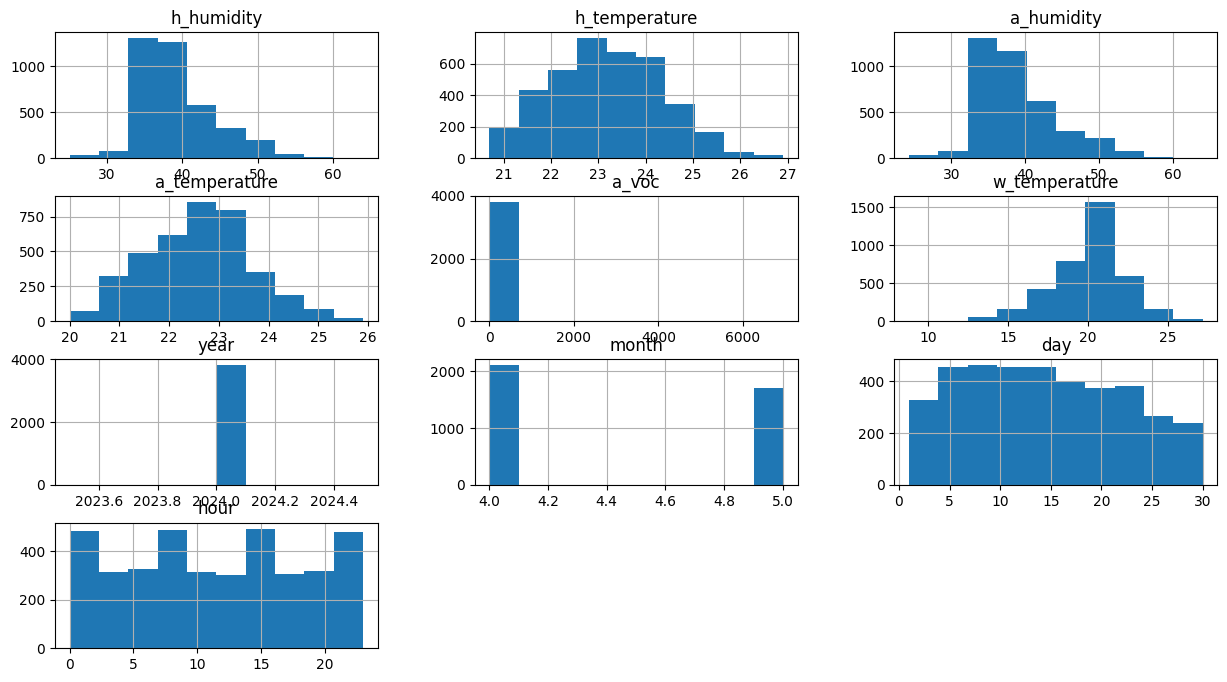

In [141]:
# train_data = train_data[~train_data['date'].isnull()]
# train_data['date'] = train_data['date'].astype(np.int64)

# test_data = test_data[~test_data['date'].isnull()]
# test_data['date'] = test_data['date'].astype(np.int64)

train_data.hist(figsize=(15, 8))

<Axes: >

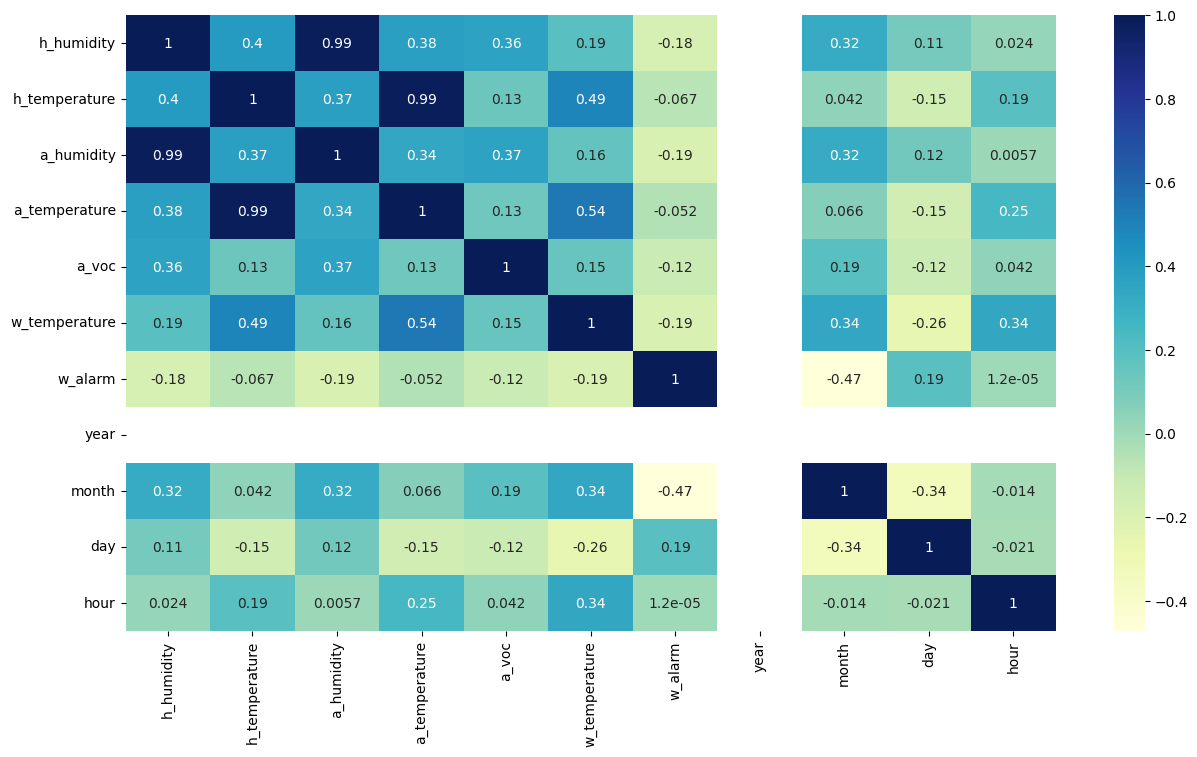

In [142]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [143]:
# train_data['a_voc'] = np.log(train_data['a_voc'] + 1)
# test_data['a_voc'] = np.log(test_data['a_voc'] + 1)

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

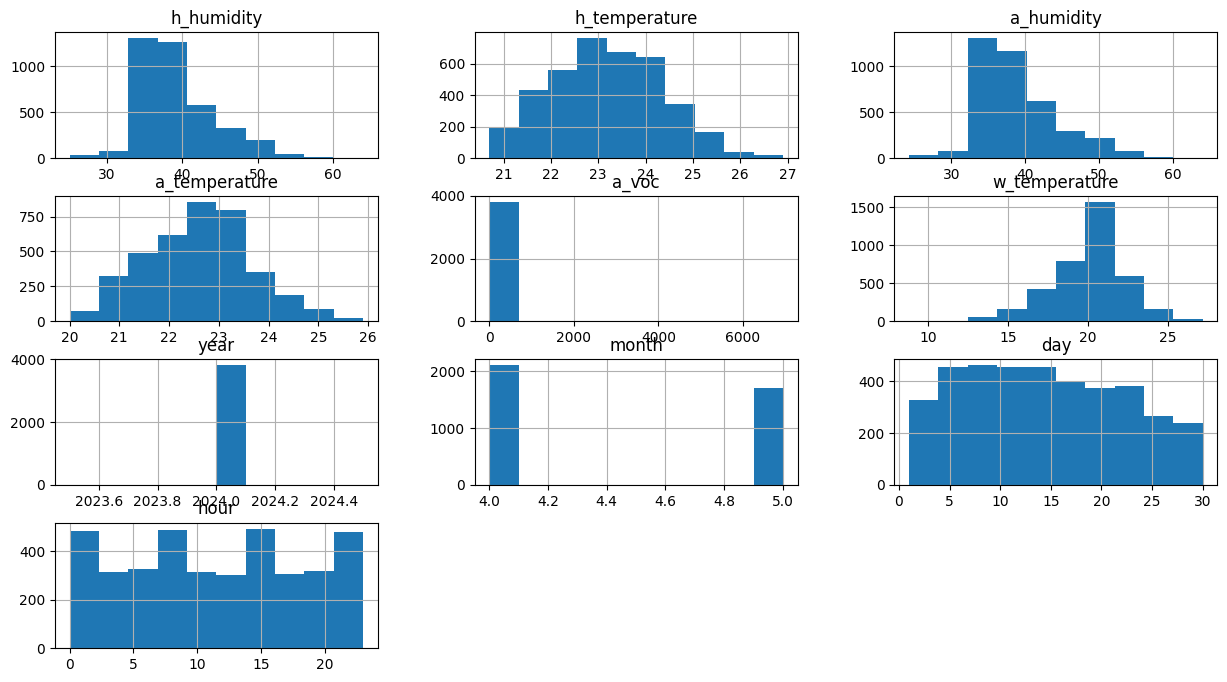

In [144]:
train_data.hist(figsize=(15,8))

In [145]:
train_data = train_data.join(pd.get_dummies(train_data.w_alarm)).drop(['w_alarm'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.w_alarm)).drop(['w_alarm'], axis=1)

In [146]:
test_data

,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,year,month,day,hour,False,True
4608,49.0,24.6,49.4,23.8,117,21.4,2024,5,23,7,True,False
1841,33.0,21.6,32.6,21.0,8,19.8,2024,4,22,18,True,False
1962,40.0,21.2,40.3,20.4,94,16.6,2024,4,24,1,True,False
3323,38.0,22.9,38.0,22.4,130,20.6,2024,5,7,8,True,False
2700,38.0,21.9,37.3,21.5,190,22.0,2024,5,1,17,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2101,44.0,22.8,42.7,22.5,137,21.9,2024,4,25,12,False,True
4077,33.0,21.8,33.1,21.2,15,19.4,2024,5,15,6,False,True
3719,44.0,23.3,43.7,22.8,198,22.3,2024,5,11,12,True,False
987,36.0,23.7,36.0,23.0,55,20.2,2024,4,13,21,False,True


<Axes: >

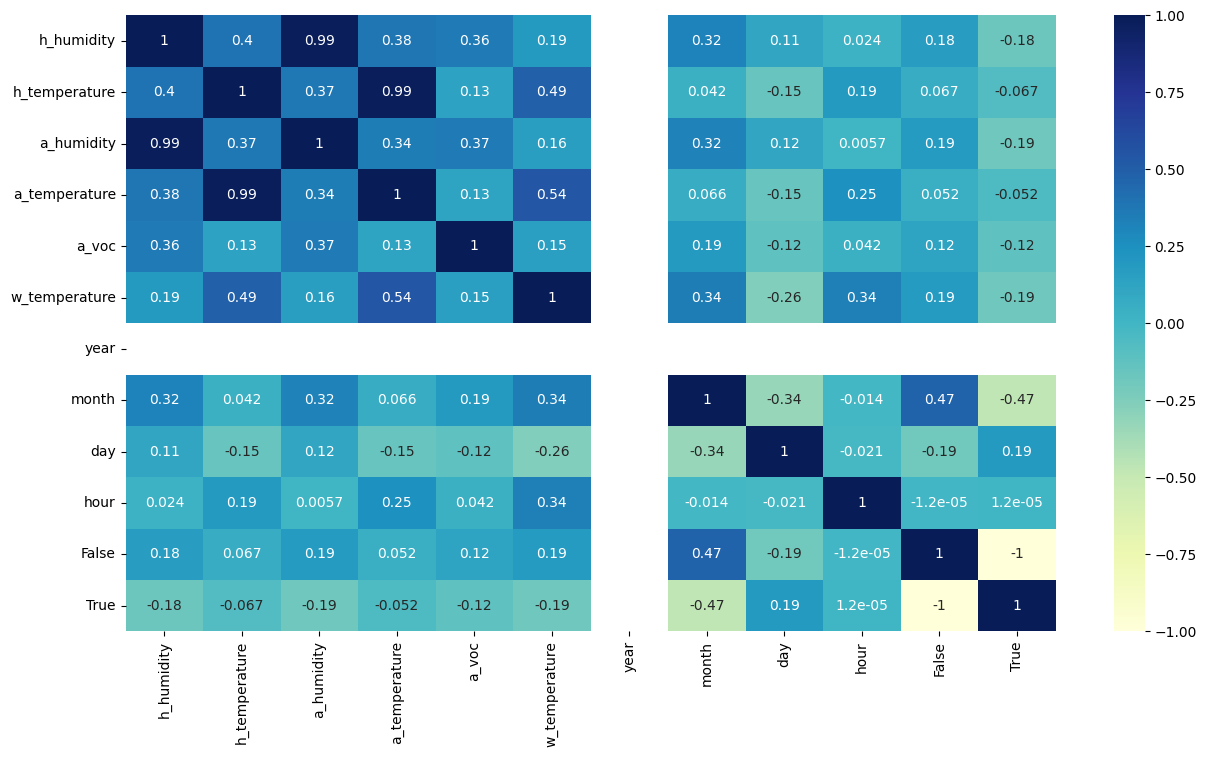

In [147]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [148]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['year', 'month', 'day', 'hour']], train_data.drop(['year', 'month', 'day', 'hour'], axis = 1)
x_test, y_test = test_data[['year', 'month', 'day', 'hour']], test_data.drop(['year', 'month', 'day', 'hour'], axis = 1)

reg = LinearRegression()
x_train, y_train

(      year  month  day  hour
 180   2024      4    5    11
 2374  2024      4   28     8
 2714  2024      5    1    21
 3698  2024      5   11     7
 3945  2024      5   13    21
 ...    ...    ...  ...   ...
 2912  2024      5    2    23
 3481  2024      5    9     0
 414   2024      4    7    22
 1379  2024      4   17    23
 1266  2024      4   16    19
 
 [3818 rows x 4 columns],
       h_humidity  h_temperature  a_humidity  a_temperature  a_voc  \
 180         40.0           24.5        39.8           23.7    184   
 2374        36.0           21.2        35.6           20.8     29   
 2714        37.0           22.1        36.6           21.8    171   
 3698        44.0           23.0        44.7           22.3    214   
 3945        36.0           23.3        35.9           22.9    112   
 ...          ...            ...         ...            ...    ...   
 2912        34.0           22.4        34.0           22.0     62   
 3481        49.0           23.5        49.3        

In [149]:
# convert x_train from a Series to a DataFrame with one column
# x_train = x_train.to_frame()

reg.fit(x_train, y_train)

LinearRegression()

In [150]:
reg.score(x_test, y_test)

0.13727452608534677

In [151]:
import joblib

# joblib.dump(reg, 'model.pkl')

In [152]:
# model = joblib.load('model.pkl')
# x_test.to_frame()
# model.predict([[2024, 6, 18, 4]])
# h_humidity	h_temperature	a_humidity	a_temperature	a_voc	w_temperature	date

In [153]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

0.8592526353382284

In [154]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [155]:
best_forest = grid_search.best_estimator_
best_forest.score(x_test, y_test)

0.8431926321981913

In [156]:
joblib.dump(best_forest, 'model.pkl')

['model.pkl']